## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [2]:
import osmnx as ox, geopandas as gpd
import pandas as pd
import matplotlib
%matplotlib inline
ox.settings.log_console=True
ox.settings.use_cache=True

For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.


In [2]:
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from pysal.explore import esda
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\boazg\AppData\Local\Programs\Python\Python312\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
c:\Users\boazg\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lsoa11cd    32844 non-null  object  
 1   lsoa11nm    32844 non-null  object  
 2   lsoa11nmw   32844 non-null  object  
 3   st_areasha  32844 non-null  float64 
 4   st_lengths  32844 non-null  float64 
 5   IMD_Rank    32844 non-null  int64   
 6   IMD_Decile  32844 non-null  int64   
 7   LSOA01NM    32844 non-null  object  
 8   LADcd       32844 non-null  object  
 9   LADnm       32844 non-null  object  
 10  IMDScore    32844 non-null  float64 
 11  IMDRank0    32844 non-null  int64   
 12  IMDDec0     32844 non-null  int64   
 13  IncScore    32844 non-null  float64 
 14  IncRank     32844 non-null  int64   
 15  IncDec      32844 non-null  int64   
 16  EmpScore    32844 non-null  float64 
 17  EmpRank     32844 non-null  int64   
 18  EmpDec      32844 non-null  int64

<Axes: >

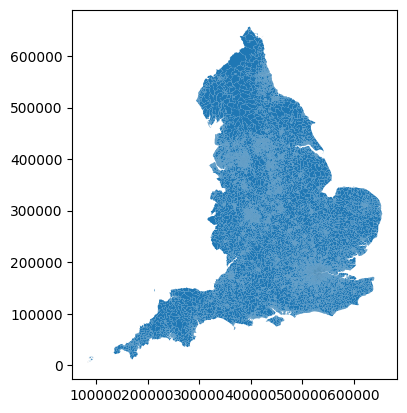

In [47]:
import os
print(os.path.exists('data/IMD/IMD/lab04_imd.shp'))
#check if path is true

imd_shp = 'data/IMD/IMD/lab04_imd.shp'
lookup_path = 'data/IMD/IMD/OAs/'
imd = gpd.read_file(imd_shp)

imd.info()
imd.plot()


In [48]:
w = weights.Queen.from_dataframe(imd, ids="lsoa11cd")
w

c:\Users\boazg\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There is 1 island with id: E01019077.
  W.__init__(self, neighbors, ids=ids, **kw)


In [49]:
w['E01006690']

{'E01006691': 1.0,
 'E01033763': 1.0,
 'E01006692': 1.0,
 'E01006695': 1.0,
 'E01006720': 1.0,
 'E01006759': 1.0,
 'E01006697': 1.0}


## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.


In [50]:
#Moran's i
y = 'IMDScore'

#Higher IMD scores indicate greater levels of deprivation (aka poverty), and lower scores indicate less deprivation.

calculate_morans_i = esda.Moran(imd[y], w)

('WARNING: ', 'E01019077', ' is an island (no neighbors)')


In [51]:
calculate_morans_i.I
#this value is >1 thus there is positive spatial autocorrelation 

0.6031245807165552

In [52]:
calculate_morans_i.p_sim
#very low p-vlaue indicates there is verly little random chance

0.001


## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

In [19]:
#Weight sums up to 1

In [21]:
w.transform
#w is transformed as indicated by 'R'

'R'

In [30]:
w['E01006690']

{'E01006691': 1.0,
 'E01033763': 1.0,
 'E01006692': 1.0,
 'E01006695': 1.0,
 'E01006720': 1.0,
 'E01006759': 1.0,
 'E01006697': 1.0}

In [31]:
#check if all values sum to one
pd.Series(w['E01006690']).sum()

7.0

In [32]:
#transforming to its original state is possible with:
w.transform = 'O'

w['E01006690']

{'E01006691': 1.0,
 'E01033763': 1.0,
 'E01006692': 1.0,
 'E01006695': 1.0,
 'E01006720': 1.0,
 'E01006759': 1.0,
 'E01006697': 1.0}


## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

In [54]:
imd = imd.set_index("lsoa11cd")

imd.crs
#data is in metres 

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [59]:
w_dist10kmB = weights.DistanceBand.from_dataframe(imd, 10000, binary=False)
#with 'binary = false' you get values adjusted to the distance from the observation of interest

c:\Users\boazg\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 8 islands with ids: E01019077, E01019229, E01019305, E01019325, E01027447, E01027479, E01027503, E01027585.
  w = W(neighbors, weights, ids, **kwargs)
c:\Users\boazg\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 8 islands with ids: E01019077, E01019229, E01019305, E01019325, E01027447, E01027479, E01027503, E01027585.
  W.__init__(


In [60]:
w_dist10kmB['E01006690']

{'E01006412': 0.0001664461364486456,
 'E01006413': 0.00016316788230951544,
 'E01006414': 0.0001732452640606962,
 'E01006415': 0.00012941412358354748,
 'E01006416': 0.00011797388461136008,
 'E01006417': 0.00012582153259262555,
 'E01006418': 0.00013127129805126932,
 'E01006419': 0.0001245449729609161,
 'E01006420': 0.00010194260606550699,
 'E01006421': 0.00013091159399963707,
 'E01006422': 0.00011466898466139244,
 'E01006423': 0.0001206469722419842,
 'E01006424': 0.00011876530224518804,
 'E01006425': 0.00013315458461018493,
 'E01006426': 0.00011261243032402919,
 'E01006427': 0.00011760172285629583,
 'E01006428': 0.00010176329459661787,
 'E01006429': 0.00010717055048462446,
 'E01006430': 0.00013106780510999165,
 'E01006431': 0.00012368616154027044,
 'E01006432': 0.00011426263315131452,
 'E01006433': 0.0001383950266734748,
 'E01006434': 0.00011563145774183125,
 'E01006435': 0.0001200696561671895,
 'E01006436': 0.00011196665029131524,
 'E01006437': 0.00011163133851007829,
 'E01006438': 0.00


## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

KeyError: 'w'

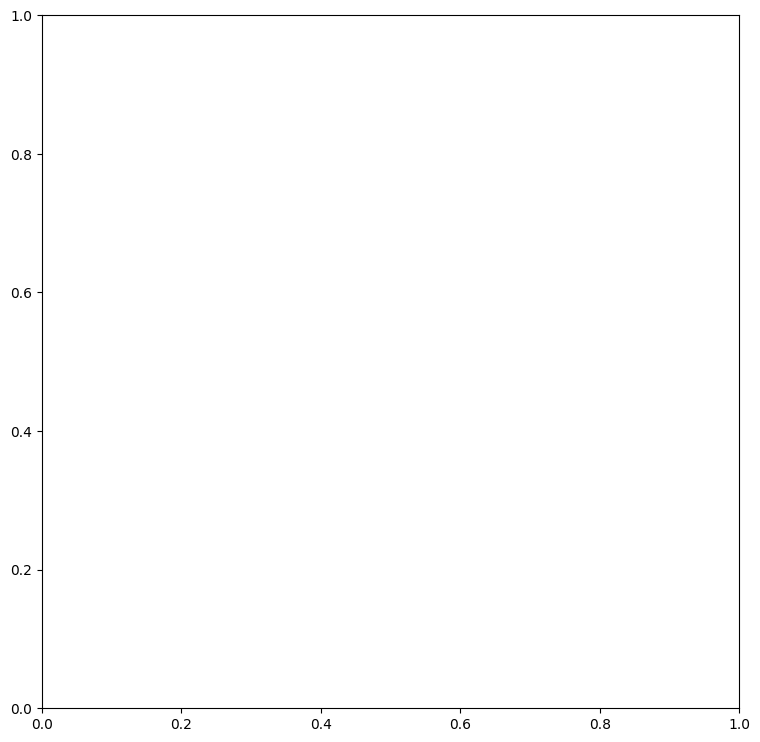

In [61]:
#not finished 

f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="IMDScore", y="w", data=imd, ci=None)
# Display
plt.show()
